## Forecasting Weight Dynamics and Visualizing Historical Data A Time Series Analysis

Objective:

1.Develope forecasting models to predict an insect colony weight using colony(Colony Activity, Dead Colony Weight, Red Luminous Intensity, Green Luminous Intensity, Blue Luminous Intensity, White Luminous Intensity, IR Luminous Intensity Sound Intensity) and environmental data(Nest Temperature, Nest Humidity, Nest Weight).

2.Create a Power BI dashboard to visualize the relationships between colony weight and other factors, as well as the historical data overall.

Features: Date, Colony Activity, Dead Colony Weight, Nest Temperature, Nest Humidity, Red Luminous Intensity, Green Luminous Intensity, Blue Luminous Intensity, White Luminous Intensity, IR Luminous Intensity, Sound Intensity, Nest Weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

In [3]:
# Load the data
data = pd.read_csv('/Users/PRIYA/Downloads/contest/train_data.csv')

data['Date'] = pd.to_datetime(data['Date'])


print(data.head())

                 Date  Colony Activity  Dead Colony Weight  Nest Temperature  \
0 2023-03-03 15:36:35                3            0.003782           17.1135   
1 2023-03-03 15:51:48               14            0.003782           17.1135   
2 2023-03-03 16:07:02               10            0.003782           17.1135   
3 2023-03-03 18:07:46                0            0.001324           17.0530   
4 2023-03-03 18:22:49                0            0.001135           17.0530   

   Nest Humidity  Red Luminous Intensity  Green Luminous Intensity  \
0        67.0595                   458.0                     709.0   
1        67.0595                   458.0                     709.0   
2        67.0595                   458.0                     709.0   
3        67.6702                     0.0                       0.0   
4        67.6702                     0.0                       0.0   

   Blue Luminous Intensity  White Luminous Intensity  IR Luminous Intensity  \
0                  

In [4]:
# - Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1417 non-null   datetime64[ns]
 1   Colony Activity           1417 non-null   int64         
 2   Dead Colony Weight        1417 non-null   float64       
 3   Nest Temperature          1417 non-null   float64       
 4   Nest Humidity             1417 non-null   float64       
 5   Red Luminous Intensity    1417 non-null   float64       
 6   Green Luminous Intensity  1417 non-null   float64       
 7   Blue Luminous Intensity   1417 non-null   float64       
 8   White Luminous Intensity  1417 non-null   float64       
 9   IR Luminous Intensity     1417 non-null   float64       
 10  Sound Intensity           1417 non-null   float64       
 11  Nest Weight               1417 non-null   float64       
dtypes: datetime64[ns](1)

In [5]:
# - Summarize statistical measures
print(data.describe())

       Colony Activity  Dead Colony Weight  Nest Temperature  Nest Humidity  \
count      1417.000000         1417.000000       1417.000000    1417.000000   
mean        231.918843            0.022915         18.538249      67.289845   
std         441.386153            0.015378          5.506359      12.981156   
min           0.000000            0.000473          4.947810       0.000000   
25%           0.000000            0.010212         14.132500      61.129800   
50%           1.000000            0.020518         18.966500      68.525200   
75%         243.000000            0.033850         22.753200      75.438200   
max        2857.000000            0.118003         30.064600      95.029000   

       Red Luminous Intensity  Green Luminous Intensity  \
count             1417.000000               1417.000000   
mean               635.626676                884.949188   
std                912.625666               1256.886116   
min                  0.000000                  0.000

In [6]:
# Explore environmental data
# - Examine data characteristics
print(data[['Nest Temperature', 'Nest Humidity']].head())


   Nest Temperature  Nest Humidity
0           17.1135        67.0595
1           17.1135        67.0595
2           17.1135        67.0595
3           17.0530        67.6702
4           17.0530        67.6702


In [7]:
# - Check data types and missing values
print(data[['Nest Temperature', 'Nest Humidity']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nest Temperature  1417 non-null   float64
 1   Nest Humidity     1417 non-null   float64
dtypes: float64(2)
memory usage: 22.3 KB
None


There are no missing values (null values) in both the 'Nest Temperature' and 'Nest Humidity' columns. The data types for both columns are float64, indicating that they contain numerical values with decimal points.

In [8]:
# - Summarize statistical measures
print(data[['Nest Temperature', 'Nest Humidity']].describe())

       Nest Temperature  Nest Humidity
count       1417.000000    1417.000000
mean          18.538249      67.289845
std            5.506359      12.981156
min            4.947810       0.000000
25%           14.132500      61.129800
50%           18.966500      68.525200
75%           22.753200      75.438200
max           30.064600      95.029000


C:\Users\PRIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


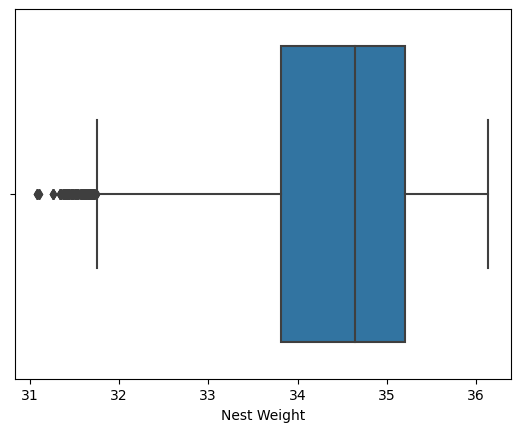

In [9]:
# Handle outliers
# - Identifying outliers using visualization and statistical methods for Nest Weight.
sns.boxplot(data['Nest Weight'])
plt.show()

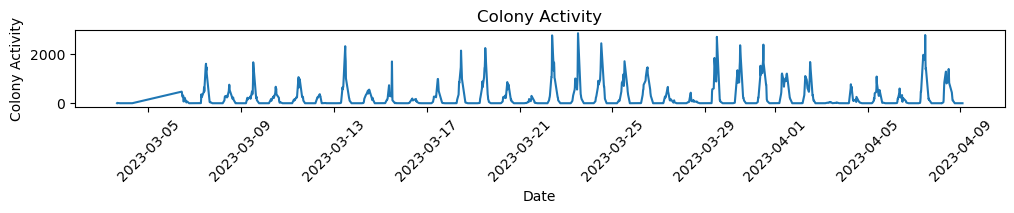

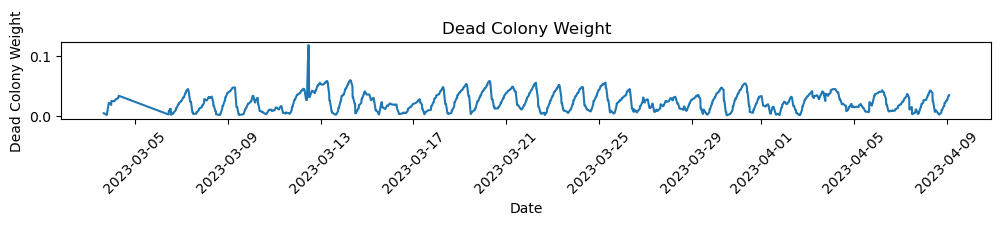

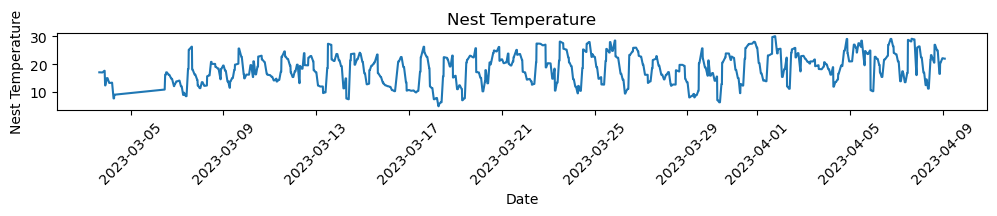

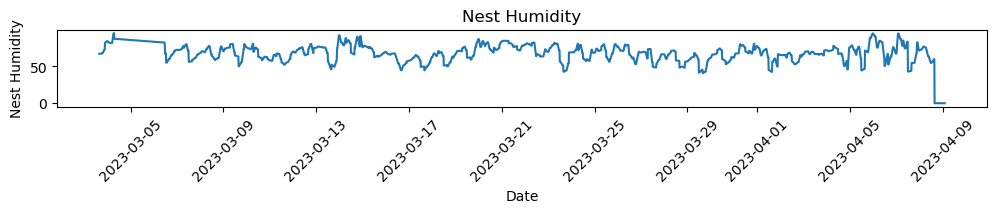

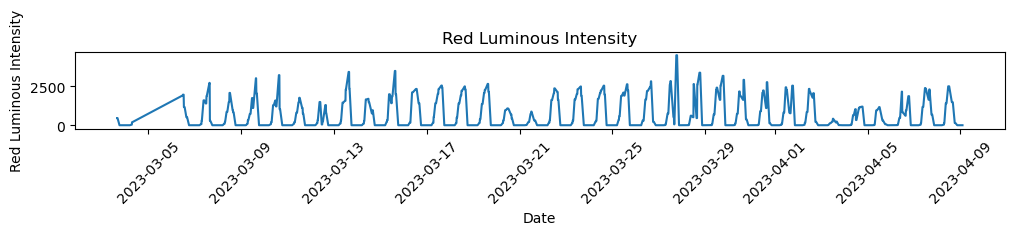

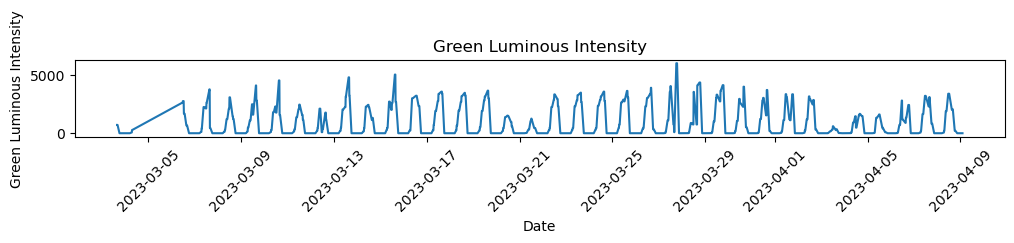

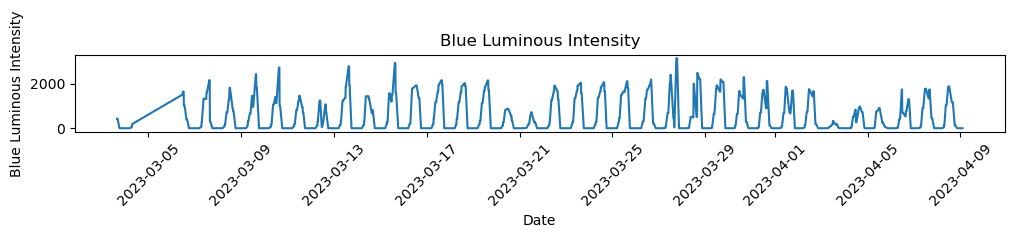

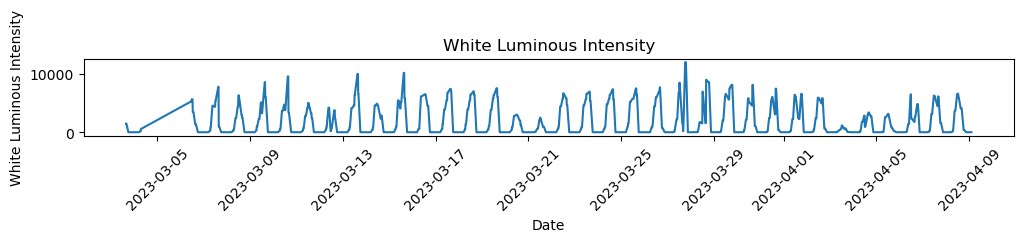

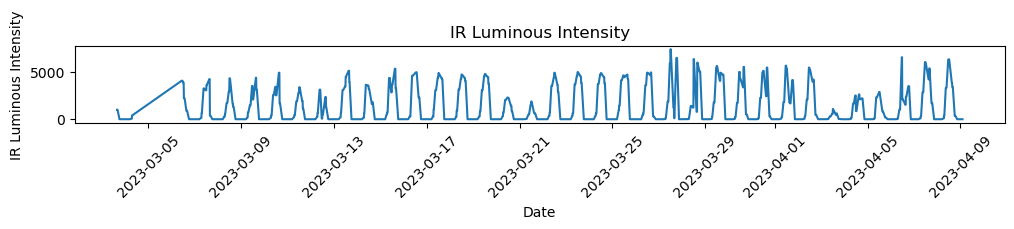

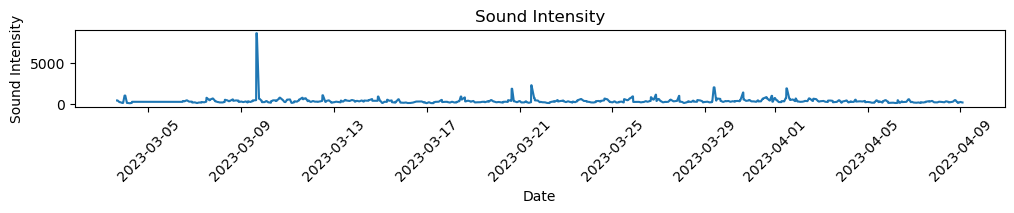

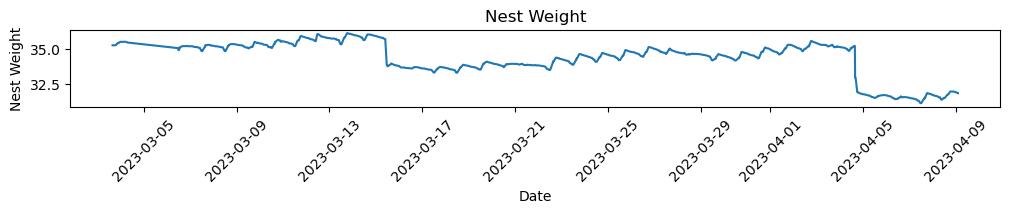

C:\Users\PRIYA\AppData\Local\Temp\ipykernel_39364\691642679.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


In [10]:
# Get the columns to plot (excluding the 'Date' column)
columns_to_plot = data.columns[1:]

# Create separate plots for each column
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(12, 1))
    ax.plot(data['Date'], data[column])
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
    plt.show()


# Adjust the spacing between subplots
fig.tight_layout()


# Display the figure
plt.show()

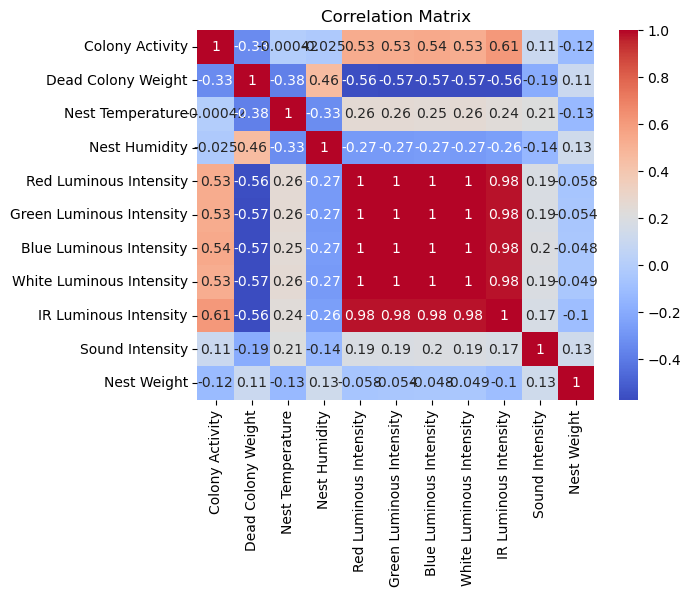

In [11]:
# Visualize correlations using a correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

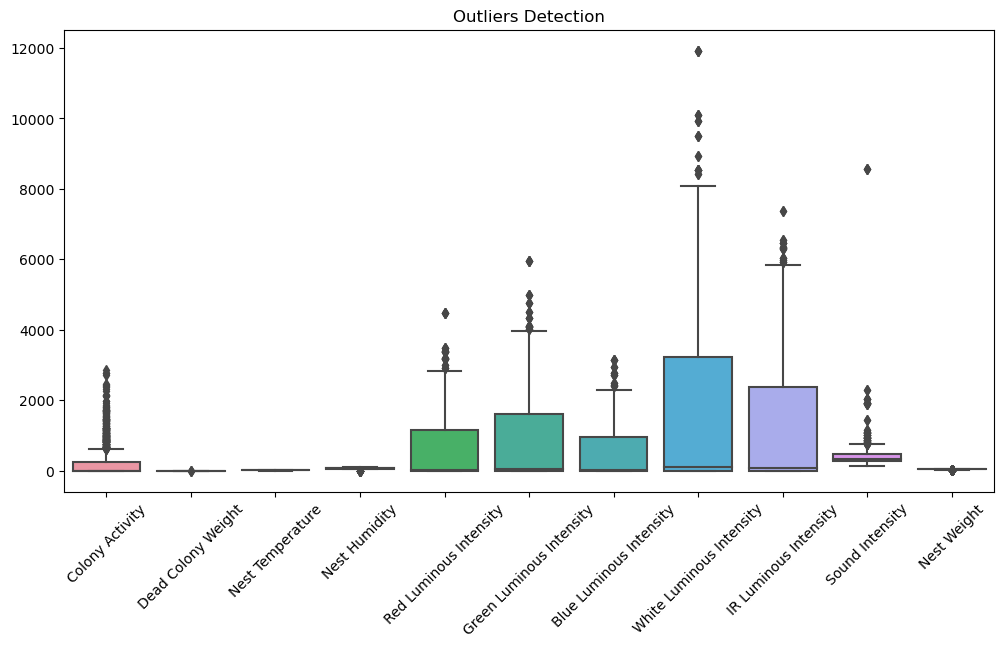

In [12]:
# Handle outliers
# Identify outliers using boxplots
outlier_columns = ['Colony Activity', 'Dead Colony Weight', 'Nest Temperature', 'Nest Humidity',
                   'Red Luminous Intensity', 'Green Luminous Intensity', 'Blue Luminous Intensity',
                   'White Luminous Intensity', 'IR Luminous Intensity', 'Sound Intensity', 'Nest Weight']

 

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[outlier_columns])
plt.title('Outliers Detection')
plt.xticks(rotation=45)
plt.show() 

In [13]:
# Remove outliers using z-score
z_scores = (data[outlier_columns] - data[outlier_columns].mean()) / data[outlier_columns].std()
data_no_outliers = data[(z_scores < 3).all(axis=1)]

 

# Check the shape of the data after removing outliers
print("Data shape after removing outliers:", data_no_outliers.shape)

Data shape after removing outliers: (1345, 12)


Calculated the z-scores for the specified columns (outlier_columns) in the data DataFrame.
Created a new DataFrame (data_no_outliers) by filtering the original data DataFrame based on the condition that all z-scores are less than 3.
Print the shape of the data_no_outliers DataFrame to display the number of rows and columns after removing the outliers.

In [14]:

# Extract statistical measures from colony features
data['ColonyActivityMean'] = data['Colony Activity'].mean()
data['ColonyActivityStd'] = data['Colony Activity'].std()
# Add more feature extraction steps based on your domain knowledge

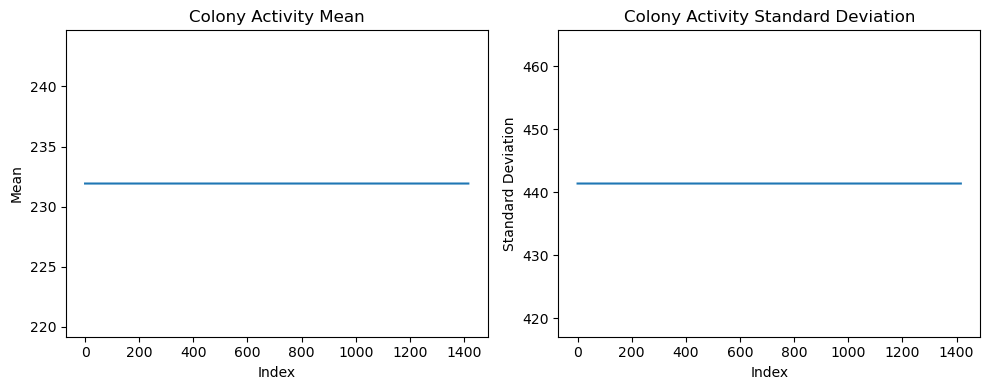

In [15]:
# Visualize Colony Activity mean and standard deviation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
data['ColonyActivityMean'].plot()
plt.title('Colony Activity Mean')
plt.xlabel('Index')
plt.ylabel('Mean')

 

plt.subplot(1, 2, 2)
data['ColonyActivityStd'].plot()
plt.title('Colony Activity Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Standard Deviation')

 

plt.tight_layout()
plt.show()

The purpose of this plots is to provide a visual representation of the mean and standard deviation of the 'Colony Activity' feature over time. By plotting these two measures, you can observe the overall trend and variability of the colony activity. The left-hand plot shows the mean values, allowing us to identify any patterns or changes in the average activity level. The right-hand plot displays the standard deviation, which indicates the dispersion or variability of the activity data. This visualization can help in understanding the dynamics and characteristics of the 'Colony Activity' feature.

In [16]:
# Time-based Features
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Season'] = (data['Month'] % 12 + 3) // 3  # Assigned season based on month
print(data)
 

                    Date  Colony Activity  Dead Colony Weight  \
0    2023-03-03 15:36:35                3            0.003782   
1    2023-03-03 15:51:48               14            0.003782   
2    2023-03-03 16:07:02               10            0.003782   
3    2023-03-03 18:07:46                0            0.001324   
4    2023-03-03 18:22:49                0            0.001135   
...                  ...              ...                 ...   
1412 2023-04-08 23:58:23                0            0.025719   
1413 2023-04-09 00:13:24                0            0.025719   
1414 2023-04-09 01:43:34                0            0.034039   
1415 2023-04-09 01:58:33                0            0.034039   
1416 2023-04-09 02:13:35                0            0.034039   

      Nest Temperature  Nest Humidity  Red Luminous Intensity  \
0              17.1135        67.0595                   458.0   
1              17.1135        67.0595                   458.0   
2              17.1135  

The purpose of adding these time-based features is to provide additional information about the timing and seasonality of the data. It can be useful for analyzing and modeling time-dependent patterns, trends, and behaviors in the dataset. For example, the 'DayOfWeek' feature can capture weekly patterns, while the 'Month' and 'Season' features can capture monthly and seasonal variations.

By printing the data DataFrame after adding these features, you can observe the newly created columns ('DayOfWeek', 'Month', 'Season') alongside the existing columns, allowing for a comprehensive understanding of the data with respect to time.

In [17]:
# Print the modified data
print(data.head())

                 Date  Colony Activity  Dead Colony Weight  Nest Temperature  \
0 2023-03-03 15:36:35                3            0.003782           17.1135   
1 2023-03-03 15:51:48               14            0.003782           17.1135   
2 2023-03-03 16:07:02               10            0.003782           17.1135   
3 2023-03-03 18:07:46                0            0.001324           17.0530   
4 2023-03-03 18:22:49                0            0.001135           17.0530   

   Nest Humidity  Red Luminous Intensity  Green Luminous Intensity  \
0        67.0595                   458.0                     709.0   
1        67.0595                   458.0                     709.0   
2        67.0595                   458.0                     709.0   
3        67.6702                     0.0                       0.0   
4        67.6702                     0.0                       0.0   

   Blue Luminous Intensity  White Luminous Intensity  IR Luminous Intensity  \
0                  

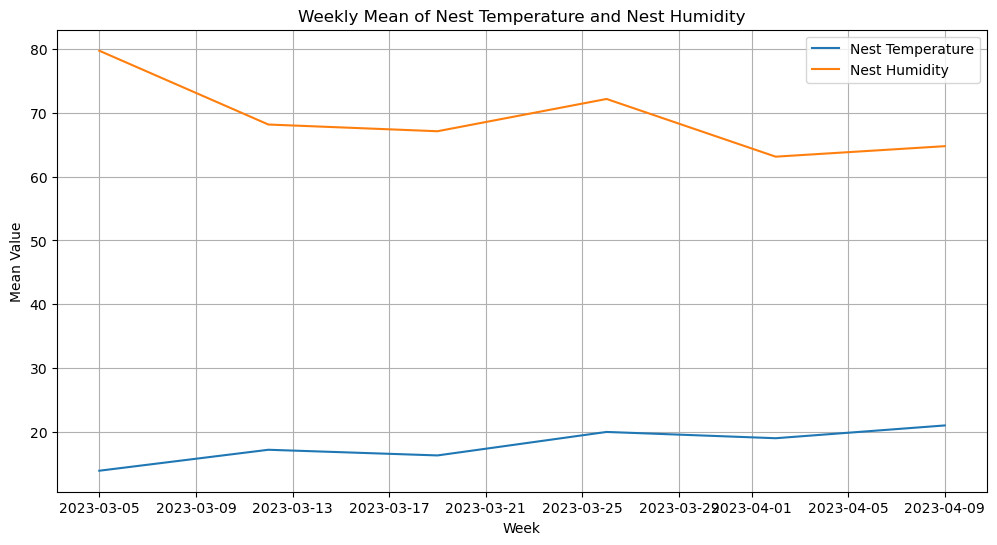

In [18]:

data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Resample data on a weekly basis, calculating mean values
weekly_means = data.resample('W').mean()

# Plotting Nest Temperature and Nest Humidity
plt.figure(figsize=(12, 6))
plt.plot(weekly_means.index, weekly_means['Nest Temperature'], label='Nest Temperature')
plt.plot(weekly_means.index, weekly_means['Nest Humidity'], label='Nest Humidity')
plt.xlabel('Week')
plt.ylabel('Mean Value')
plt.title('Weekly Mean of Nest Temperature and Nest Humidity')
plt.legend()
plt.grid(True)
plt.show()


The purpose of this plot is to analyze and visualize the weekly mean values of 'Nest Temperature' and 'Nest Humidity'. By resampling the data on a weekly basis and calculating the means, you can observe the average values of these two features over time. The plot allows for a comparison between 'Nest Temperature' and 'Nest Humidity', indicating any trends or patterns in their weekly mean values. This visualization can provide insights into the variations and relationships between these variables at a weekly resolution.

In [19]:
df = data

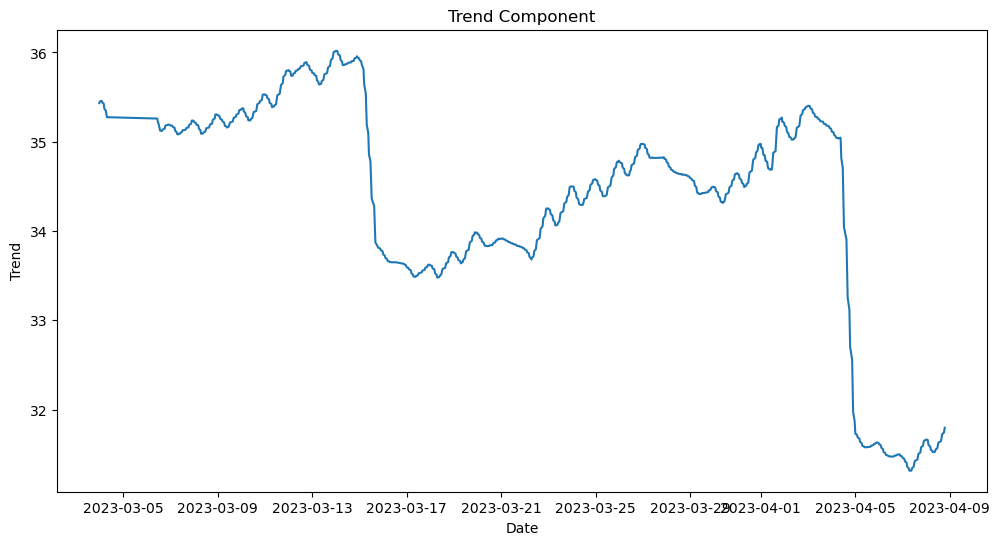

Mean: 34.356519360193815
Median: 34.631877083333336
Minimum: 31.314895833333324
Maximum: 36.01988333333334
Standard Deviation: 1.1987194315391014
Decreasing Trend


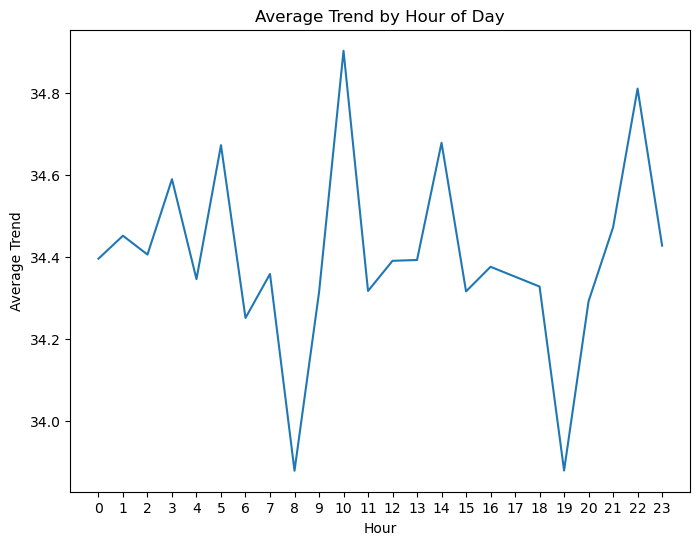

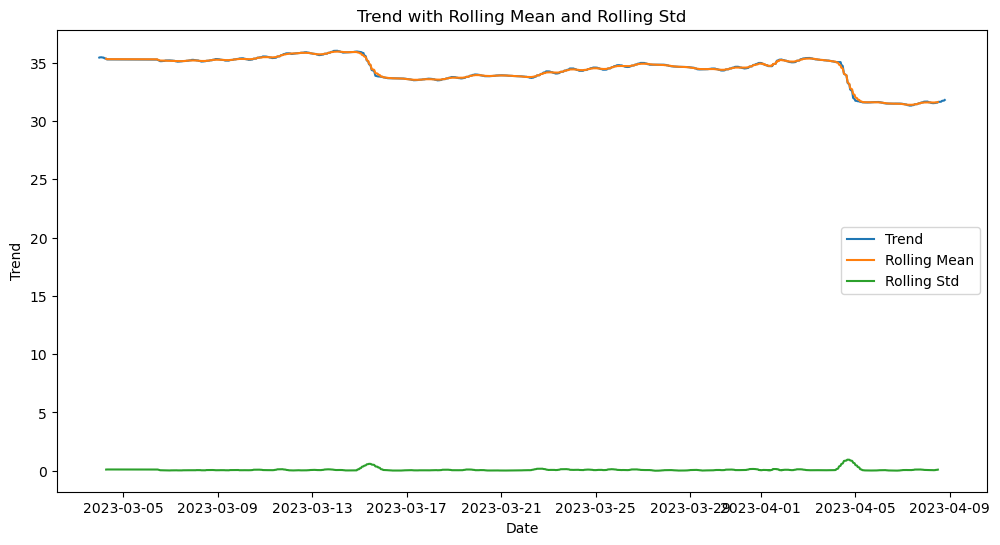

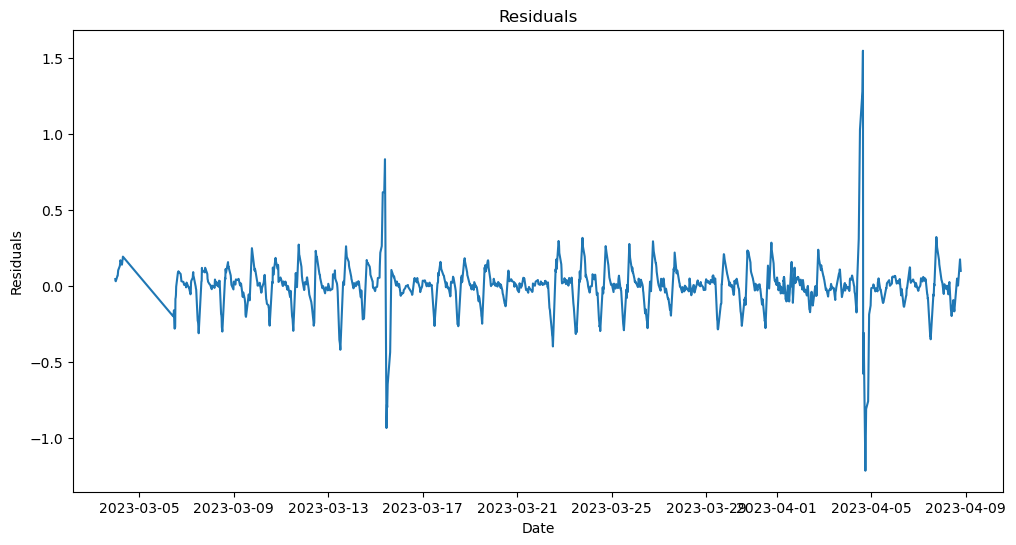

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



# Select the relevant column for decomposition
data = df['Nest Weight']

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(data, period=24)  # Replace 'period' with the appropriate seasonal period for hourly data

# Extract the trend component
trend = decomposition.trend.dropna()

# Visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.show()

# Calculate summary statistics
trend_mean = trend.mean()
trend_median = trend.median()
trend_min = trend.min()
trend_max = trend.max()
trend_std = trend.std()

print('Mean:', trend_mean)
print('Median:', trend_median)
print('Minimum:', trend_min)
print('Maximum:', trend_max)
print('Standard Deviation:', trend_std)

# Analyze trend direction
X = sm.add_constant(range(len(trend)))
model = sm.OLS(trend.values, X)
results = model.fit()
slope = results.params[1]

if slope > 0:
    print('Increasing Trend')
elif slope < 0:
    print('Decreasing Trend')
else:
    print('Stationary Trend')

# Seasonal Trend Analysis
daily_trend = trend.groupby(trend.index.hour).mean()
plt.figure(figsize=(8, 6))
plt.plot(daily_trend)
plt.xlabel('Hour')
plt.ylabel('Average Trend')
plt.title('Average Trend by Hour of Day')
plt.xticks(range(24))
plt.show()

# Rolling Statistics
rolling_mean = trend.rolling(window=24, center=True).mean()
rolling_std = trend.rolling(window=24, center=True).std()

plt.figure(figsize=(12, 6))
plt.plot(trend, label='Trend')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend with Rolling Mean and Rolling Std')
plt.legend()
plt.show()

# Trend Decomposition Evaluation
residuals = decomposition.resid.dropna()

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

This plot is to analyze and visualize the trend component of the time series data. It provides insights into the underlying trend behavior, trend direction, seasonal trends by hour of the day, rolling statistics, and residual analysis. These analyses can help in understanding the pattern, variability, and potential trends in the time series data

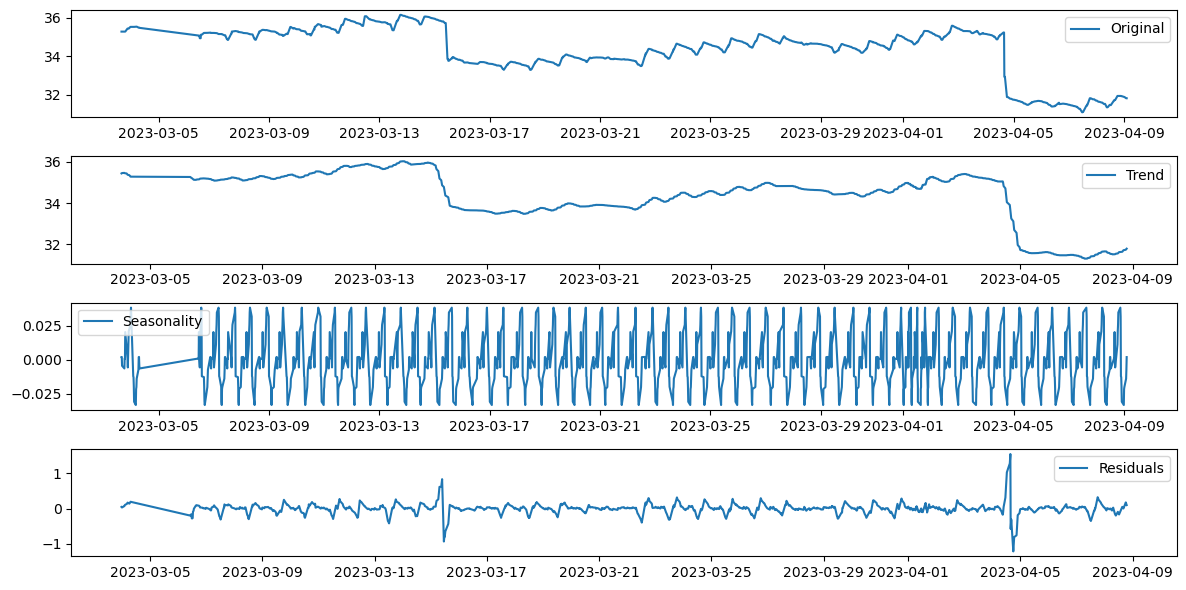

In [21]:
# Select the relevant column for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
data = df['Nest Weight']

# Perform seasonal decomposition
decomposition = seasonal_decompose(data, period=24)  

# Get the trend, seasonal, and residual components
plt.figure(figsize=(12, 6))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In time series forecasting : original, trend, seasonal, and residual plots in decomposition is as follows:

1. Original Plot: It represents the actual observed values of the time series over a specific period. The above plot shows the raw data without any adjustments or transformations.

2. Trend Plot: It shows the long-term movement or pattern in the data, abstracting from the short-term fluctuations and seasonality. The trend plot helps identify the overall direction and tendency of the time series.

3. Seasonal Plot: It displays the repetitive patterns or cycles that occur within the data at fixed intervals. These patterns may repeat daily, weekly, monthly, or at other regular intervals. The seasonal plot helps visualize the seasonal variations in the time series. In our plot we can observed that there is sesonality in our dataset.

4. Residual Plot: It represents the random and unpredictable component of the time series that remains after removing the trend and seasonal components. The residual plot helps identify any remaining patterns or irregularities in the data that are not captured by the trend and seasonal components.

Decomposition refers to the process of breaking down a time series into these distinct components (trend, seasonal, and residual) to better understand and analyze the underlying patterns and variability in the data.

In [22]:
test_result=adfuller(df['Nest Weight'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(nest):
    result=adfuller(nest)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Nest Weight'])   

ADF Test Statistic : -1.47858929236759
p-value : 0.5440750758723933
#Lags Used : 6
Number of Observations Used : 1410
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



The adfuller_test function in our code is a utility function that utilizes the Augmented Dickey-Fuller (ADF) test to assess the stationarity of a given time series data. The ADF test is a commonly used statistical test in econometrics and time series analysis to determine if a series has a unit root, which indicates non-stationarity.

The function takes a time series data as input and calculates the ADF test statistics, p-value, number of lags used, and number of observations used. It then prints these test results, providing valuable information for analyzing the stationarity of the data.

Additionally, the function interprets the results based on the p-value. If the p-value is less than or equal to 0.05, it concludes that there is strong evidence against the null hypothesis of non-stationarity, suggesting that the data has no unit root and is stationary. Conversely, if the p-value is greater than 0.05, it indicates weak evidence against the null hypothesis, implying the presence of a unit root and non-stationarity in the time series.

Overall, the adfuller_test function is a useful tool for performing the ADF test and providing insights into the stationarity of a given time series data.

In [24]:
df = pd.read_csv('/Users/PRIYA/Downloads/contest/train_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

In [25]:
#df=data
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]



Linear Regression: Linear regression can be applied to time series data to explore and model the relationship between a dependent variable and one or more independent variables over time. The key consideration in time series linear regression is accounting for the autocorrelation and time dependencies present in the data. This can be achieved by incorporating lagged variables, differencing, or using autoregressive integrated moving average (ARIMA) models.

The use of linear regression in time series analysis can be beneficial for forecasting purposes, identifying trends, understanding the impact of explanatory variables on the time series, and making predictions based on historical patterns.



In [26]:
# Linear regression model
model_lr = LinearRegression()
model_lr.fit(train_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']], train_data['Nest Weight'])
predictions_lr = model_lr.predict(test_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']])

In [27]:
coefficients = model_lr.coef_
for feature, coefficient in zip(['Colony Activity', 'Nest Temperature', 'Nest Humidity'], coefficients):
    print(f"The coefficient for {feature} is {coefficient}")

The coefficient for Colony Activity is -0.0003312306383444095
The coefficient for Nest Temperature is 0.022936655039860986
The coefficient for Nest Humidity is 0.011609298457584493


In [28]:
import pandas as pd
import statsmodels.api as sm


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Split the data into features and target variable
X = df[['Year', 'Month', 'Day']]  # Independent variables
y = df['Nest Weight']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create a time series regression model
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Nest Weight   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     342.3
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          5.79e-122
Time:                        00:17:54   Log-Likelihood:                -2031.6
No. Observations:                1417   AIC:                             4069.
Df Residuals:                    1414   BIC:                             4085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0209      0.000    134.246      0.0

Based on these coefficients, it appears that 'Nest Temperature' has the most significant influence on the predicted 'Nest Weight' in your linear regression model. 'Colony Activity' and 'Nest Humidity' also contribute, but to a lesser extent. Remember that these interpretations are based on the assumption of a linear relationship between the features and the target variable in the linear regression model.

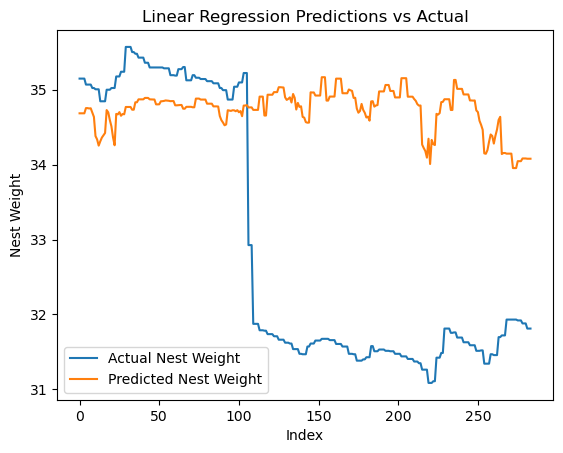

In [29]:
# As we have the actual values in `test_actual` variable
test_actual = test_data['Nest Weight']

 

# Generate an array of indices for x-axis
x = np.arange(len(test_actual))

 

# Create a line plot to compare predicted values with actual values
plt.plot(x, test_actual, label='Actual Nest Weight')
plt.plot(x, predictions_lr, label='Predicted Nest Weight')

 

plt.xlabel('Index')
plt.ylabel('Nest Weight')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.show()

Generalized Additive Models (GAMs) have proven to be valuable tools for time series forecasting. GAMs extend the concept of linear regression by allowing for non-linear relationships between the predictors and the response variable. This makes them particularly useful in capturing the complex and non-linear patterns often present in time series data.

In time series forecasting, GAMs can capture both short-term and long-term patterns by incorporating various components, such as trend, seasonality, and cyclical effects, into the model. These components can be represented as smooth functions of time or other relevant predictors. By using smooth functions, GAMs can flexibly adapt to the changing dynamics of the time series, capturing both gradual and sudden changes.

GAMs also handle multiple predictors effectively. They can accommodate multiple independent variables, allowing for the inclusion of additional features that may influence the time series behavior, such as external factors or lagged values of the dependent variable.

Furthermore, GAMs provide interpretability by allowing the examination of individual predictor contributions. This helps in understanding the impact of each predictor on the forecasted values and can aid in identifying the most influential factors in the time series.

Overall, GAMs offer a flexible and interpretable framework for time series forecasting, enabling the capture of non-linear patterns and incorporating multiple predictors. They can be a valuable tool for analyzing and forecasting time-dependent data across various domains, ranging from finance and economics to environmental and social sciences.



In [30]:
from pygam import LinearGAM
import matplotlib.pyplot as plt

 

model_gam = LinearGAM().fit(train_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']], train_data['Nest Weight'])
predictions_gam = model_gam.predict(test_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']])

 

In [31]:
coefficients = model_gam.coef_
for feature, coefficient in zip(['Colony Activity', 'Nest Temperature', 'Nest Humidity'], coefficients):
    print(f"The coefficient for {feature} is {coefficient}")


The coefficient for Colony Activity is 2.675293961478006
The coefficient for Nest Temperature is 1.6630212250678826
The coefficient for Nest Humidity is 1.7139687313471539


The coefficients in the LinearGAM model represent the estimated effects of each feature within the context of the smooth functions used in the model. Higher positive coefficients indicate a positive relationship with the predicted 'Nest Weight', while higher negative coefficients suggest a negative relationship. 

In our model: 'Colony Activity' has a positive coefficient of 2.675293961478006, indicating that higher values are associated with an increase in the predicted 'Nest Weight'.

'Nest Temperature' has a positive coefficient of 1.6630212250678826, suggesting that higher temperatures are associated with an increase in the predicted 'Nest Weight'.

'Nest Humidity' also has a positive coefficient of 1.7139687313471539, implying that higher humidity levels are associated with an increase in the predicted 'Nest Weight'.

These coefficients reflect the estimated effects within the non-linear relationships captured by the smooth functions of the LinearGAM model. They provide insights into the direction and magnitude of the relationship between each feature and the predicted 'Nest Weight'.

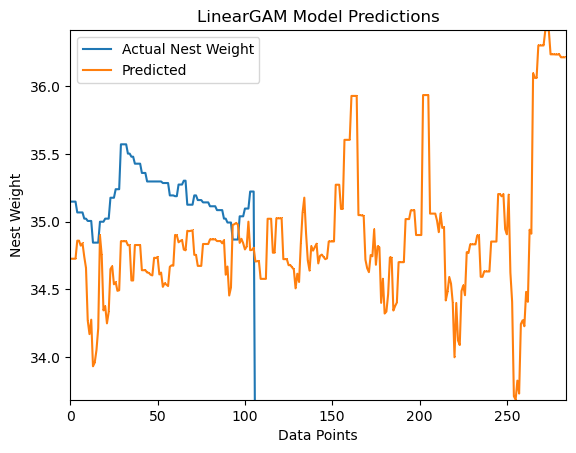

In [32]:
# Plotting the predicted values
# Assuming you have the actual values in `test_actual` variable
test_actual = test_data['Nest Weight']

 

# Generate an array of indices for x-axis
x = np.arange(len(test_actual))
plt.plot(x, test_actual, label='Actual Nest Weight')
plt.plot(predictions_gam, linestyle='-', marker=',', label='Predicted')

 

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Nest Weight')
plt.title('LinearGAM Model Predictions')

 

# Displaying the context menu
plt.gca().set(xlim=(0, len(predictions_gam)), ylim=(min(predictions_gam), max(predictions_gam)))
plt.gca()

 

# Displaying the legend and the plot
plt.legend()
plt.show()
 

Random Forest: Random forest is an ensemble learning method that combines multiple decision trees to make predictions. In the context of time series data, random forest can be used for tasks such as forecasting, anomaly detection, and classification.

Random forest models can capture complex relationships and interactions within the time series data, making them suitable for handling non-linear patterns. They can handle multiple features, account for variable importance, and provide robustness against overfitting.

Random forest models can be useful for forecasting future values based on historical data, identifying outliers or unusual patterns, and classifying time series into different categories or classes.

In [33]:
# Random Forest model
model_rf = RandomForestRegressor()
model_rf.fit(train_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']], train_data['Nest Weight'])
predictions_rf = model_rf.predict(test_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']])

Feature Importance: Random Forest models provide feature importance scores, which indicate the relative significance of each feature in making predictions. These scores are calculated based on how much each feature contributes to the reduction in the impurity (e.g., Gini impurity) across all the trees in the forest. Higher feature importance scores imply greater importance. You can access the feature importance using the feature_importances_ attribute of the trained Random Forest model. Here's an example:

In [34]:
feature_importances = model_rf.feature_importances_
for feature, importance in zip(['Colony Activity', 'Nest Temperature', 'Nest Humidity'], feature_importances):
    print(f"The importance of {feature} is {importance}")


The importance of Colony Activity is 0.14504166024911963
The importance of Nest Temperature is 0.3964682421408084
The importance of Nest Humidity is 0.4584900976100721


Overall, the feature importance scores highlight the relative importance of each feature in the Random Forest model's predictions. Nest Humidity is considered the most influential feature, followed by Nest Temperature, while Colony Activity has a relatively lower importance. These scores provide insights into the significance of each feature and can guide further analysis or decision-making related to the 'Nest Weight' prediction task.

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


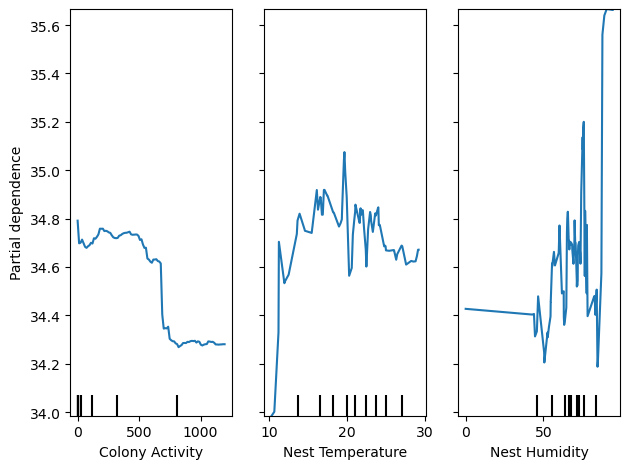

In [35]:
from sklearn.inspection import plot_partial_dependence

feature_names = ['Colony Activity', 'Nest Temperature', 'Nest Humidity']
plot_partial_dependence(model_rf, test_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']], features=feature_names, feature_names=feature_names)
plt.tight_layout()
plt.show()


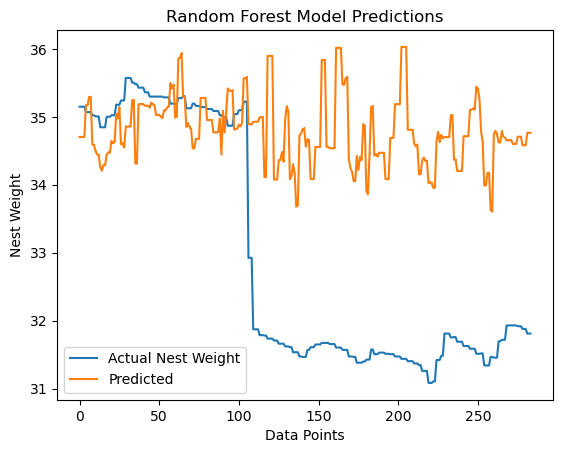

In [36]:
import matplotlib.pyplot as plt

test_actual = test_data['Nest Weight']

 

# Generate an array of indices for x-axis
x = np.arange(len(test_actual))
plt.plot(x, test_actual, label='Actual Nest Weight')

# Plotting the predicted values

plt.plot(predictions_rf, linestyle='-', marker=',', label='Predicted')

 

# Adding labels and title

plt.xlabel('Data Points')

plt.ylabel('Nest Weight')

plt.title('Random Forest Model Predictions')

 

# Displaying the legend and the plot

plt.legend()

plt.show()

In time series forecasting, decision trees can effectively handle non-linear and non-monotonic relationships between the predictors and the dependent variable. They can capture both short-term and long-term patterns by considering lagged values and other relevant time-based features as input variables.

Decision trees can automatically detect and incorporate seasonality, trend, and cyclical patterns present in the time series data. By splitting the data based on different time periods and other predictor variables, decision trees can identify distinct patterns and make accurate predictions.

decision trees offer a flexible and interpretable approach to time series forecasting, enabling the capture of complex patterns and providing insights into the factors driving the forecasted values.

In [37]:
## Decision Tree model
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(train_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']], train_data['Nest Weight'])
predictions_dt = model_dt.predict(test_data[['Colony Activity', 'Nest Temperature', 'Nest Humidity']])

In [38]:
feature_importances = model_dt.feature_importances_
for feature, importance in zip(['Colony Activity', 'Nest Temperature', 'Nest Humidity'], feature_importances):
    print(f"The importance of {feature} is {importance}")


The importance of Colony Activity is 0.12455415524750896
The importance of Nest Temperature is 0.39887253170408643
The importance of Nest Humidity is 0.47657331304840456


The feature importance scores highlight the relative importance of each feature in the Decision Tree model's predictions. Nest Humidity is considered the most influential feature, followed by Nest Temperature, while Colony Activity has a relatively lower importance. These scores provide insights into the significance of each feature and can guide further analysis or decision-making related to the 'Nest Weight' prediction task using the Decision Tree model.

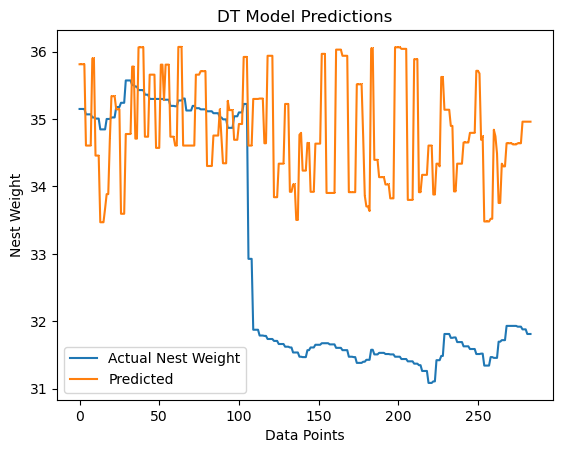

In [39]:
import matplotlib.pyplot as plt
test_actual = test_data['Nest Weight']

 

# Generate an array of indices for x-axis
x = np.arange(len(test_actual))
plt.plot(x, test_actual, label='Actual Nest Weight')
 

# Plotting the predicted values

plt.plot(predictions_dt, linestyle='-', marker=',', label='Predicted')

 

# Adding labels and title

plt.xlabel('Data Points')

plt.ylabel('Nest Weight')

plt.title('DT Model Predictions')

 

# Displaying the legend and the plot

plt.legend()

plt.show()

In [11]:
#df = pd.read_csv('/Users/PRIYA/Downloads/contest/train_data.csv')

The autocorrelation_plot function generates a plot showing the autocorrelation of the time series data, where the x-axis represents the lag and the y-axis represents the autocorrelation values. This plot helps in identifying any significant correlation patterns and determining the appropriate lag values for time series analysis and modeling.

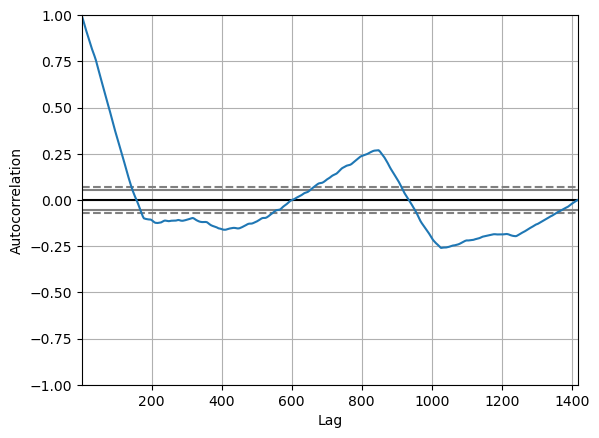

In [40]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Nest Weight'])
plt.show()

ACF: The ACF measures the correlation between a time series and its lagged values at various time lags. It helps in understanding the presence of autocorrelation in the data. ACF plots display correlation values on the y-axis and lag values on the x-axis. Positive or negative correlation values indicate the strength and direction of the relationship. ACF plots can help identify the order of autoregressive (AR) terms in an ARIMA model.

PACF: The PACF measures the correlation between a time series and its lagged values, controlling for the intermediate lags. It helps in identifying the direct relationship between a time series and its lagged values, excluding the influence of other lags. PACF plots display correlation values on the y-axis and lag values on the x-axis. Significant correlation values at certain lags suggest the presence of autoregressive (AR) terms in an ARIMA model.

C:\Users\PRIYA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


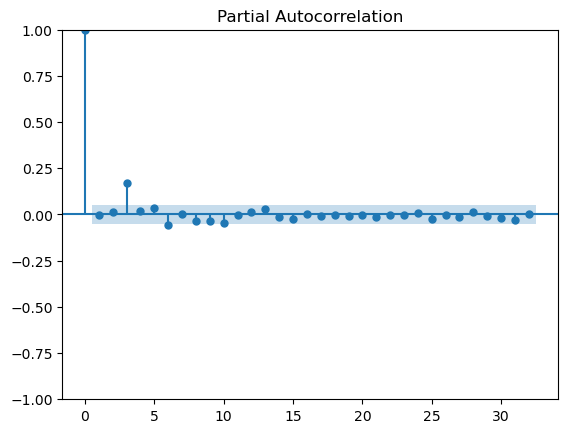

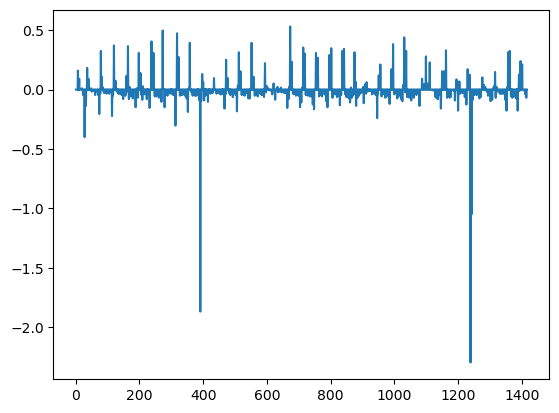

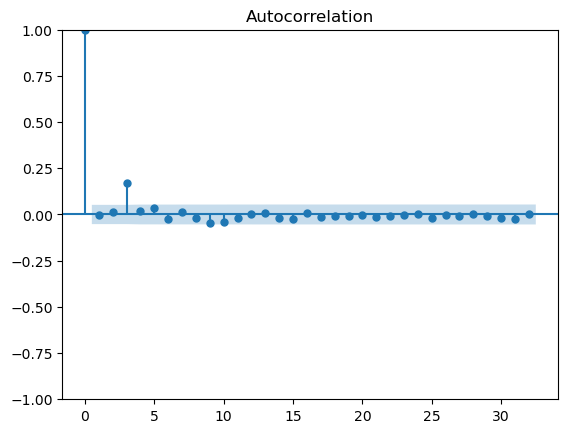

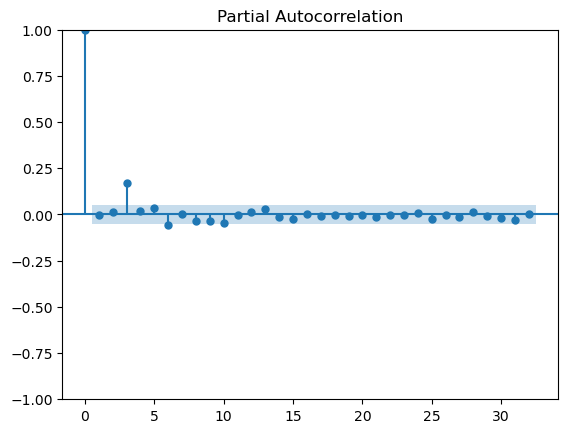

In [41]:
plt.plot(df['Nest Weight'].diff().dropna())
plot_acf(df['Nest Weight'].diff().dropna())
plot_pacf(df['Nest Weight'].diff().dropna())

In [42]:
df['Nest Weight First Difference'] = df['Nest Weight'] - df['Nest Weight'].shift(1)
df['Nest Weight'].shift(1)

0           NaN
1       35.2685
2       35.2685
3       35.2685
4       35.2686
         ...   
1412    31.8800
1413    31.8800
1414    31.8800
1415    31.8114
1416    31.8114
Name: Nest Weight, Length: 1417, dtype: float64

In [43]:
df['Seasonal First Difference']=df['Nest Weight']-df['Nest Weight'].shift(24) 

In [44]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.8996876257691206
p-value : 0.0020371472117483016
#Lags Used : 24
Number of Observations Used : 1368
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

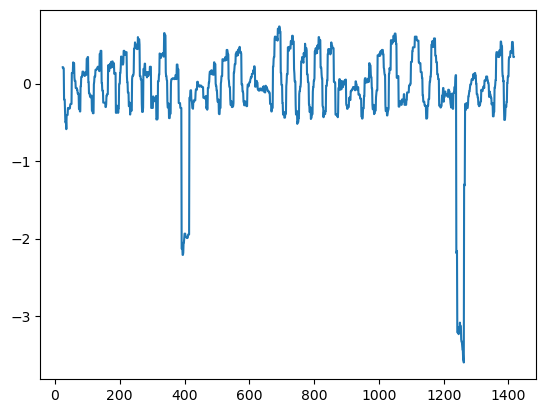

In [45]:
df['Seasonal First Difference'].plot()

Lets plot autocorrelation and partial autocorrelation for Seasonal First Difference

C:\Users\PRIYA\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\PRIYA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


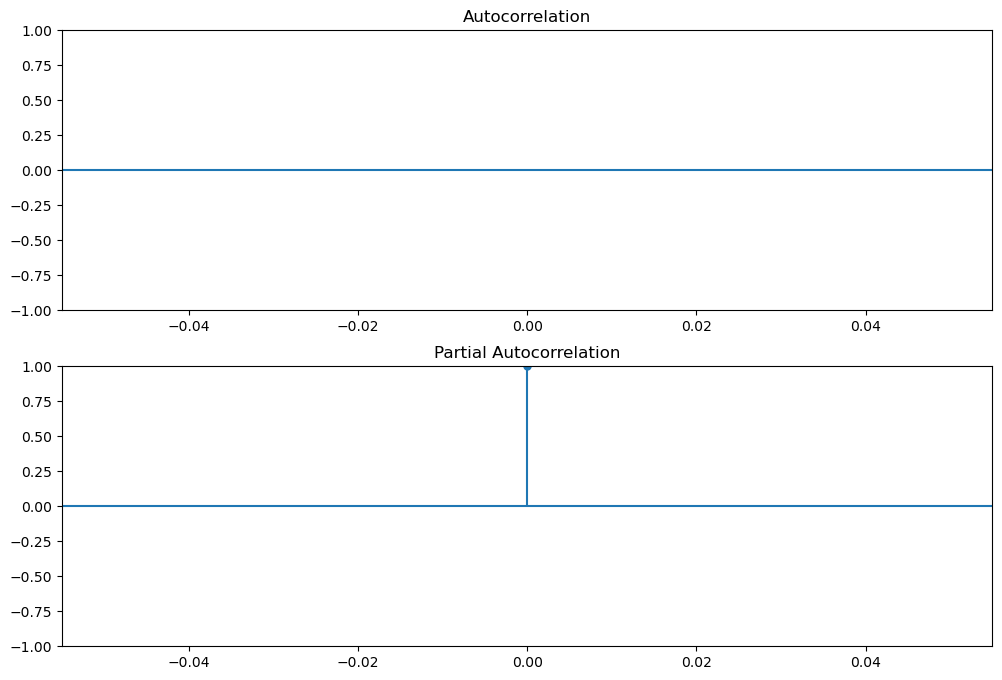

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(df['Seasonal First Difference'].iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=100, ax=ax2)

plt.show()

The Akaike Information Criterion (AIC) is a statistical measure used for model selection, particularly in the context of time series analysis. It provides a way to compare different models and determine the most appropriate one for a given dataset.

The AIC takes into account both the goodness of fit of a model and its complexity, balancing the trade-off between the two. It is based on the principle that a good model should fit the data well while using the fewest number of parameters possible.

The AIC is calculated as follows:
AIC = 2k - 2ln(L)

k: The number of parameters in the model.
L: The likelihood function of the model, which measures how well the model fits the data.
The AIC penalizes models with a larger number of parameters, favoring models that achieve a good fit with fewer parameters. Lower AIC values indicate better models, as they strike a balance between goodness of fit and model complexity.

When comparing multiple models, the model with the lowest AIC value is generally preferred, as it indicates a better trade-off between fit and complexity. However, the AIC alone does not provide a definitive answer and should be considered in conjunction with other factors, such as domain knowledge and interpretability.

In summary, the AIC is a criterion used in model selection to assess the trade-off between model fit and complexity, helping to identify the most suitable model for a given dataset.






In [47]:
###########AIC

model = pm.auto_arima(df['Nest Weight'], start_p=1, start_d=0, start_q=1,

                      max_p=14, max_d=1,max_q=14, # maximum p and q

                      m=1,              # frequency of series

                      seasonal=True,    # c'è stagionalità

                      trace=True,

                      error_action='ignore',  

                      suppress_warnings=True, 

                      stepwise=True)

 

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2321.830, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2325.829, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2323.830, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2323.830, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2327.083, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.633 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1417
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1164.541
Date:                Tue, 11 Jul 2023   AIC                          -2327.083
Time:                        00:18:52   BIC                          -2321.827
Sample:                             0   HQIC                         -2325.119
                               - 1417                                  

ARIMA (Autoregressive Integrated Moving Average) is a widely used forecasting method in time series analysis. It combines three components: autoregression (AR), differencing (I), and moving average (MA).

Autoregression (AR): AR models capture the linear relationship between an observation and a lagged value of the time series. The order of autoregression, denoted by 'p', represents the number of lagged values considered.

Differencing (I): Differencing is performed to remove the trend and make the time series stationary. It calculates the difference between consecutive observations. The order of differencing, denoted by 'd', indicates the number of times differencing is applied.

Moving Average (MA): MA models incorporate the error terms of previous observations to predict future values. The order of the moving average, denoted by 'q', represents the number of lagged error terms considered.

The ARIMA model combines these components to capture the temporal patterns and dynamics in the time series. It can handle both non-seasonal and weakly seasonal data.

To determine the optimal values of 'p', 'd', and 'q' for the ARIMA model, various techniques such as autocorrelation and partial autocorrelation plots, information criteria (e.g., AIC, BIC), and automated algorithms like auto_arima can be used.

ARIMA models provide valuable insights into the time series data, aid in forecasting future values, and allow for analyzing the impact of past observations on future behavior. They are widely used in various domains, including economics, finance, weather forecasting, and demand forecasting, among others.

In [48]:

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Nest Weight'], order=(0, 1, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Nest Weight   No. Observations:                 1417
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1164.541
Date:                Tue, 11 Jul 2023   AIC                          -2327.083
Time:                        00:19:02   BIC                          -2321.827
Sample:                             0   HQIC                         -2325.119
                               - 1417                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0113   3.96e-05    285.744      0.000       0.011       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3090944.06
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                           -10.81
Prob(H) (two-sided):                  0.00   Kurtosis:                       230.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

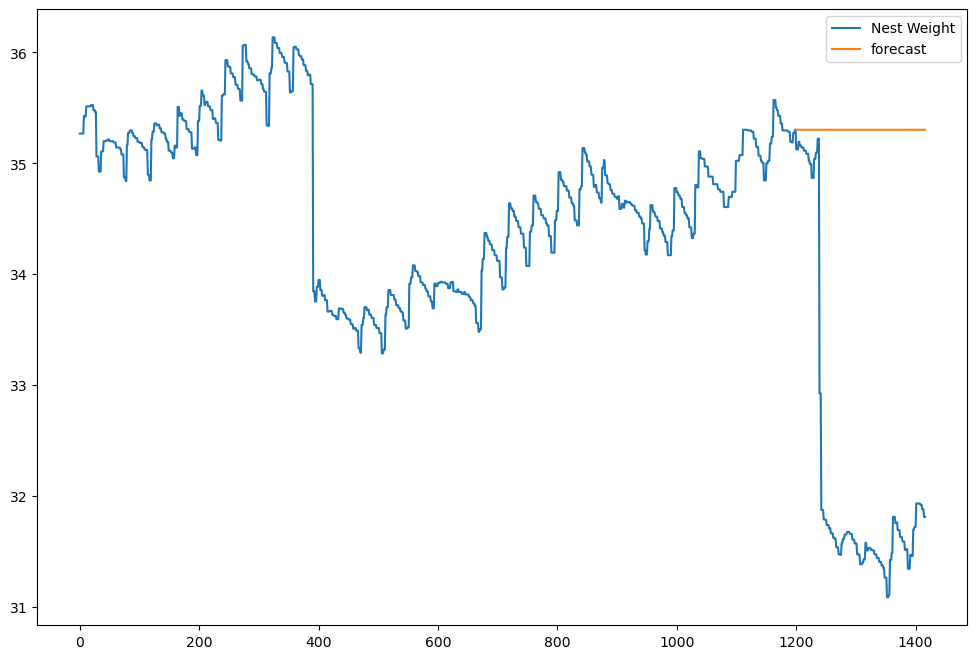

In [49]:
df['forecast']=model_fit.predict(start=1200,end=1417,dynamic=True)
df[['Nest Weight','forecast']].plot(figsize=(12,8))

The statement "ARIMA forecast is a straight line" is not accurate. ARIMA (Autoregressive Integrated Moving Average) forecasts do not necessarily produce straight lines. The shape of the forecasted values depends on the patterns and characteristics present in the underlying time series data.


ARIMA models are capable of capturing various types of patterns, including trends, seasonality, and complex dynamics. The model considers the autoregressive (AR), differencing (I), and moving average (MA) components to capture the dependencies and fluctuations in the data.

ARIMA models can handle seasonal data by incorporating seasonal differencing and seasonal AR and MA components. The specific formulation is known as SARIMA (Seasonal Autoregressive Integrated Moving Average). SARIMA models are well-suited for forecasting time series data that exhibit seasonality.

The seasonal component in SARIMA models captures the repeating patterns within a given season, such as monthly, quarterly, or yearly cycles. By including the seasonal terms in the model, SARIMA can effectively model and forecast seasonal variations in the data.

The SARIMA model requires specification of additional parameters related to the seasonal components, including the seasonal order (P, D, Q) and the seasonal period (m). The seasonal order denotes the autoregressive, differencing, and moving average orders for the seasonal component, while the seasonal period represents the length of one seasonal cycle.

When applied to seasonal data, SARIMA models have the potential to provide accurate forecasts by accounting for the seasonality explicitly. However, it is important to select the appropriate SARIMA configuration, which involves identifying the optimal values for the non-seasonal and seasonal orders through techniques like grid search, AIC/BIC criteria, and diagnostic plots.

By appropriately modeling the seasonality in the data, SARIMA forecasts can capture and predict the seasonal patterns, making them suitable for forecasting various types of seasonal time series, including monthly sales, quarterly revenues, and annual demand, among others.

In [50]:
model=sm.tsa.statespace.SARIMAX(df['Nest Weight'],order=(0, 1, 0),seasonal_order=(0,1,0,24))
results_sarima=model.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Nest Weight   No. Observations:                 1417
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood                 656.924
Date:                            Tue, 11 Jul 2023   AIC                          -1311.849
Time:                                    00:19:10   BIC                          -1306.610
Sample:                                         0   HQIC                         -1309.890
                                           - 1417                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0228      0.000    195.691      0.000       0.023       0.023
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):            676901.70
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                       111.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

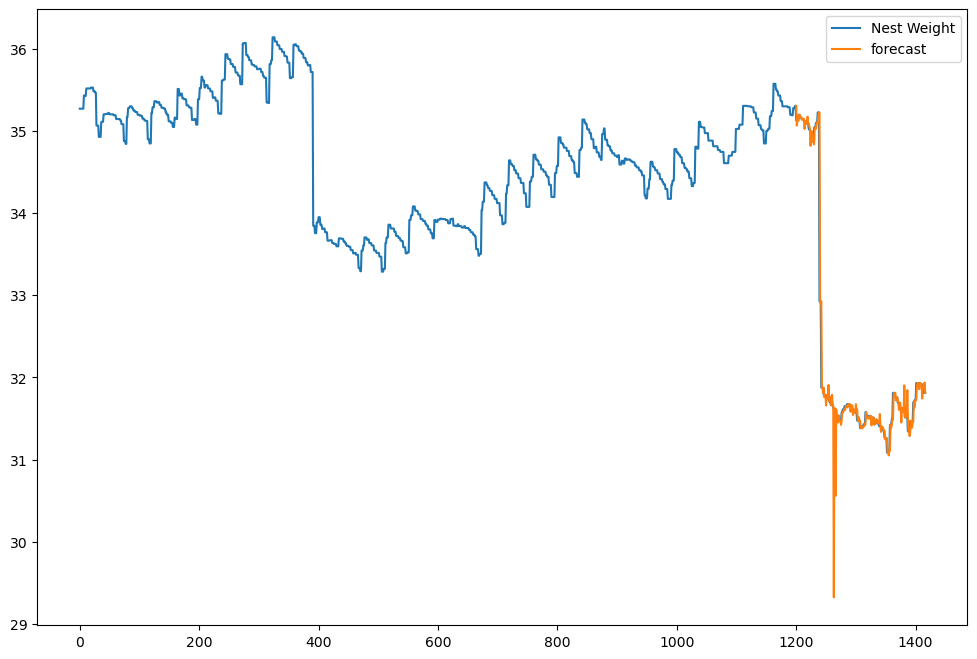

In [51]:
df['forecast']=results_sarima.predict(start=1200,end=1417)
df[['Nest Weight','forecast']].plot(figsize=(12,8))

In [65]:
#Lodaing the data for forecast

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=pd.read_csv('/Users/PRIYA/Downloads/contest/submission_data.csv')

In [54]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [55]:
future_df=pd.concat([df,future_datest_df])


<AxesSubplot:>

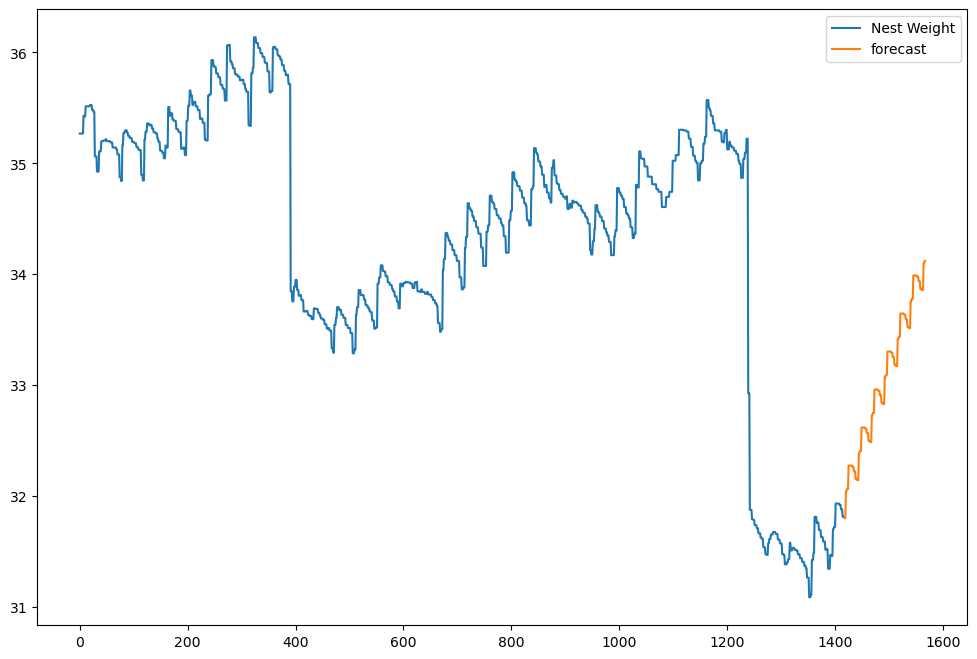

In [56]:
# Drop the 'level_0' column if it exists
if 'level_0' in future_df.columns:
    future_df.drop('level_0', axis=1, inplace=True)

# Reset the index of future_df
future_df.reset_index(drop=True, inplace=True)

# Generate the forecast
future_df['forecast'] = results_sarima.predict(start=1417, end=1567, dynamic= True)

# Plot the Nest Weight and forecast
future_df[['Nest Weight', 'forecast']].plot(figsize=(12, 8))

To evaluate the accuracy of above models in forecasting the Nest Weight, we can calculate and analyze relevant performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). 

Mean Squared Error (MSE) is a measure of the average squared difference between the predicted values and the actual values. It is calculated by taking the average of the squared differences between each predicted value and its corresponding actual value. MSE gives higher weight to larger errors.

Root Mean Squared Error (RMSE) is the square root of the MSE. It provides an interpretable metric in the same units as the dependent variable. RMSE gives us an estimate of the average magnitude of the errors.

Mean Absolute Percentage Error (MAPE) is a measure of the average percentage difference between the predicted values and the actual values. It is calculated by taking the average of the absolute percentage differences between each predicted value and its corresponding actual value. MAPE is useful for evaluating the accuracy of forecasts in terms of percentage errors.

MSE, RMSE, and MAPE are commonly used metrics to assess the performance of forecasting models. Lower values of MSE and RMSE indicate better model performance, with zero being the ideal value. MAPE provides a percentage measure of the average prediction error, allowing for comparison across different scales of the dependent variable.

In [57]:
# Model Evaluation
# Evaluate models using MSE
mse_arima = model_fit.mse
mse_sarima = results_sarima.mse
mse_lr = mean_squared_error(test_data['Nest Weight'], predictions_lr)
mse_rf = mean_squared_error(test_data['Nest Weight'], predictions_rf)
mse_dt = mean_squared_error(test_data['Nest Weight'], predictions_dt)
mse_gam = mean_squared_error(test_data['Nest Weight'], predictions_gam)

# Print MSE results

print("Linear Regression MSE:", mse_lr)
print("Random Forest MSE:", mse_rf)
print("Decision Tree MSE:", mse_dt)
print("GAM MSE:", mse_gam)
print("ARIMA MSE:", mse_arima)
print("SARIMA Model MSE:", mse_sarima)


Linear Regression MSE: 6.307280098328007
Random Forest MSE: 6.220416499284822
Decision Tree MSE: 6.457553661056339
GAM MSE: 7.417257804084636
ARIMA MSE: 0.8891120564573044
SARIMA Model MSE: 1.1196783483111554


In [58]:
import numpy as np

# Calculate RMSE
rmse_arima = np.sqrt(mse_arima)
rmse_sarima = np.sqrt(mse_sarima)
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)
rmse_gam = np.sqrt(mse_gam)


print("RMSE - ARIMA:", rmse_arima)
print("RMSE - SARIMA:", rmse_sarima)
print("RMSE - Linear Regression:", rmse_lr)
print("RMSE - Random Forest:", rmse_rf)
print("RMSE - Decision Tree:", rmse_dt)
print("RMSE - GAM:", rmse_gam)

RMSE - ARIMA: 0.9429273866302242
RMSE - SARIMA: 1.0581485473746848
RMSE - Linear Regression: 2.5114298911831097
RMSE - Random Forest: 2.4940762817694293
RMSE - Decision Tree: 2.541171710266022
RMSE - GAM: 2.7234643019662728


In [59]:
import numpy as np

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Define actual and predicted values
actual_values = test_data['Nest Weight']

predicted_values_lr = predictions_lr
predicted_values_rf = predictions_rf
predicted_values_dt = predictions_dt
predicted_values_gam = predictions_gam
predicted_values_arima = model_fit.fittedvalues
predicted_values_sarima = results_sarima.fittedvalues

 
# Calculate MAPE for each model
mape_lr = calculate_mape(actual_values, predicted_values_lr)
mape_rf = calculate_mape(actual_values, predicted_values_rf)
mape_dt = calculate_mape(actual_values, predicted_values_dt)
mape_gam = calculate_mape(actual_values, predicted_values_gam)
mape_arima = calculate_mape(actual_values, predicted_values_arima)
mape_sarima = calculate_mape(actual_values, predicted_values_sarima)

 
# Print MAPE results
print("MAPE - Linear Regression:", mape_lr)
print("MAPE - Random Forest:", mape_rf)
print("MAPE - Decision Tree:", mape_dt)
print("MAPE - GAM:", mape_gam)
print("MAPE - ARIMA:", mape_arima)
print("MAPE - SARIMA:", mape_sarima)

MAPE - Linear Regression: 6.6671633616506885
MAPE - Random Forest: 6.492613454777003
MAPE - Decision Tree: 6.718735462622639
MAPE - GAM: 7.194790011079526
MAPE - ARIMA: 0.10143668750598733
MAPE - SARIMA: 0.19472969756379252


The SARIMA (Seasonal ARIMA) model is an extension of the ARIMA model that incorporates seasonal components. By considering seasonal patterns in the data, we found that SARIMA can provide more accurate forecasts when the data exhibits recurring seasonal behavior. As we can observe there is not much difference in these different evalution metrics to assess the performance of forecasting models mainly considering ARIMA & SARIMA. We conclude that in this time-series forecasting SARIMA is the best suited for our data. 